## Churn - model_selection - prediction


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [55]:
train_data = pd.read_csv('train.csv')

train_data.sample(10)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
705,OR,67,area_code_415,yes,no,0,120.9,58,20.55,235.0,88,19.98,95.1,130,4.28,11.4,11,3.08,2,no
3287,MI,164,area_code_415,no,no,0,215.6,90,36.65,171.6,99,14.59,110.4,105,4.97,11.3,6,3.05,1,no
1030,AR,109,area_code_510,no,no,0,170.7,101,29.02,240.2,82,20.42,119.0,112,5.36,11.4,4,3.08,2,no
2680,NV,148,area_code_510,no,no,0,216.2,95,36.75,185.7,105,15.78,300.0,143,13.50,10.0,5,2.70,2,no
3929,CA,85,area_code_415,no,no,0,195.7,104,33.27,182.9,121,15.55,324.7,110,14.61,8.6,9,2.32,0,no
3525,ME,42,area_code_510,no,no,0,139.4,109,23.70,223.8,121,19.02,244.9,105,11.02,4.6,3,1.24,1,no
146,KS,70,area_code_408,no,no,0,232.1,122,39.46,292.3,112,24.85,201.2,112,9.05,0.0,0,0.00,3,no
741,ME,66,area_code_408,no,yes,26,254.9,108,43.33,243.2,135,20.67,190.8,95,8.59,5.4,3,1.46,2,no
2254,NJ,88,area_code_415,no,no,0,301.5,136,51.26,257.7,72,21.90,132.9,118,5.98,13.4,2,3.62,4,yes
1429,NM,132,area_code_408,no,no,0,169.9,107,28.88,209.4,121,17.80,206.1,79,9.27,11.5,2,3.11,1,no


In [56]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   state                          4250 non-null   object 
 1   account_length                 4250 non-null   int64  
 2   area_code                      4250 non-null   object 
 3   international_plan             4250 non-null   object 
 4   voice_mail_plan                4250 non-null   object 
 5   number_vmail_messages          4250 non-null   int64  
 6   total_day_minutes              4250 non-null   float64
 7   total_day_calls                4250 non-null   int64  
 8   total_day_charge               4250 non-null   float64
 9   total_eve_minutes              4250 non-null   float64
 10  total_eve_calls                4250 non-null   int64  
 11  total_eve_charge               4250 non-null   float64
 12  total_night_minutes            4250 non-null   f

Выделим матрицу признаков и вектор с целевой переменной в тренировочной выборке

<AxesSubplot:>

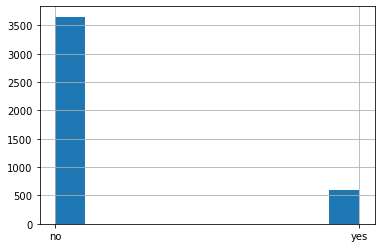

In [57]:
train_data.churn.hist()

In [58]:
train_data['churn'] = train_data.churn.apply(lambda x: 1 if x == 'yes' else 0)

In [59]:
train_data.sample(7)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
2981,TN,96,area_code_415,no,no,0,264.6,117,44.98,264.1,121,22.45,77.1,89,3.47,8.1,4,2.19,0,0
4030,ID,43,area_code_415,no,no,0,253.6,110,43.11,253.3,92,21.53,161.3,103,7.26,10.2,3,2.75,3,1
1769,MS,136,area_code_415,no,yes,24,174.6,76,29.68,176.6,114,15.01,214.4,91,9.65,8.8,5,2.38,2,0
3984,MN,138,area_code_510,no,no,0,54.8,123,9.32,147.5,76,12.54,173.6,119,7.81,11.5,1,3.11,1,0
3206,SD,88,area_code_415,no,no,0,177.8,112,30.23,226.5,80,19.25,221.8,71,9.98,7.9,4,2.13,1,0
3970,SD,140,area_code_415,no,no,0,191.8,67,32.61,261.1,52,22.19,252.7,112,11.37,10.8,3,2.92,6,0
860,DC,148,area_code_415,no,yes,11,252.9,129,42.99,284.3,88,24.17,262.8,99,11.83,12.3,1,3.32,1,0


In [60]:
num_cols = []
str_cols = []

cols_and_type = train_data.dtypes.to_dict()

for col in cols_and_type:
    if cols_and_type[col] in ('int64', 'float64'):
        num_cols.append(col)
    else: 
        str_cols.append(col)
        
print(num_cols)

['account_length', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls', 'churn']


In [61]:
cols_and_type

{'state': dtype('O'),
 'account_length': dtype('int64'),
 'area_code': dtype('O'),
 'international_plan': dtype('O'),
 'voice_mail_plan': dtype('O'),
 'number_vmail_messages': dtype('int64'),
 'total_day_minutes': dtype('float64'),
 'total_day_calls': dtype('int64'),
 'total_day_charge': dtype('float64'),
 'total_eve_minutes': dtype('float64'),
 'total_eve_calls': dtype('int64'),
 'total_eve_charge': dtype('float64'),
 'total_night_minutes': dtype('float64'),
 'total_night_calls': dtype('int64'),
 'total_night_charge': dtype('float64'),
 'total_intl_minutes': dtype('float64'),
 'total_intl_calls': dtype('int64'),
 'total_intl_charge': dtype('float64'),
 'number_customer_service_calls': dtype('int64'),
 'churn': dtype('int64')}

In [17]:
train_data[num_cols].describe()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
count,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000,4250.000000
mean,100.236235,7.631765,180.259600,99.907294,30.644682,200.173906,100.176471,17.015012,200.527882,99.839529,9.023892,10.256071,4.426353,2.769654,1.559059
std,39.698401,13.439882,54.012373,19.850817,9.182096,50.249518,19.908591,4.271212,50.353548,20.093220,2.265922,2.760102,2.463069,0.745204,1.311434
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,0.000000,143.325000,87.000000,24.365000,165.925000,87.000000,14.102500,167.225000,86.000000,7.522500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,0.000000,180.450000,100.000000,30.680000,200.700000,100.000000,17.060000,200.450000,100.000000,9.020000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,16.000000,216.200000,113.000000,36.750000,233.775000,114.000000,19.867500,234.700000,113.000000,10.560000,12.000000,6.000000,3.240000,2.000000
max,243.000000,52.000000,351.500000,165.000000,59.760000,359.300000,170.000000,30.540000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


## Построим графики, посмотрим на распределение признаков

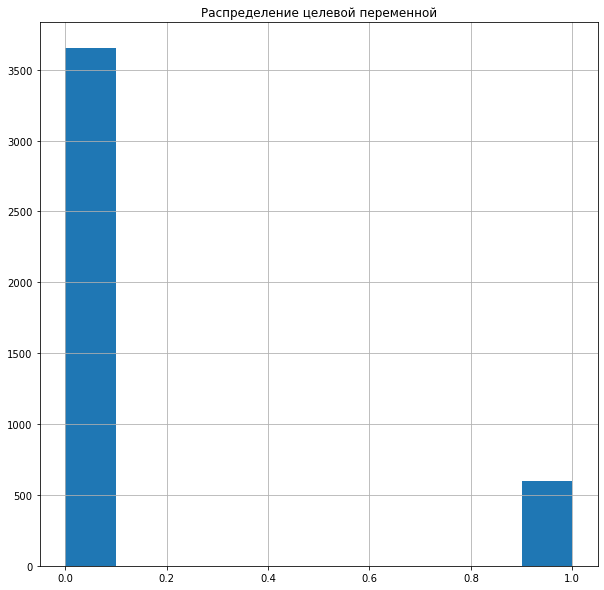

In [18]:
plt.figure(figsize = (10, 10))
plt.title('Распределение целевой переменной')
train_data['churn'].hist()

plt.show()

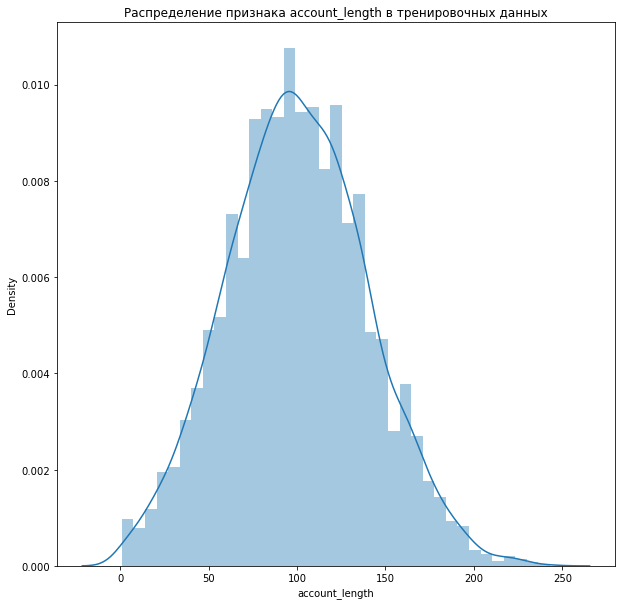

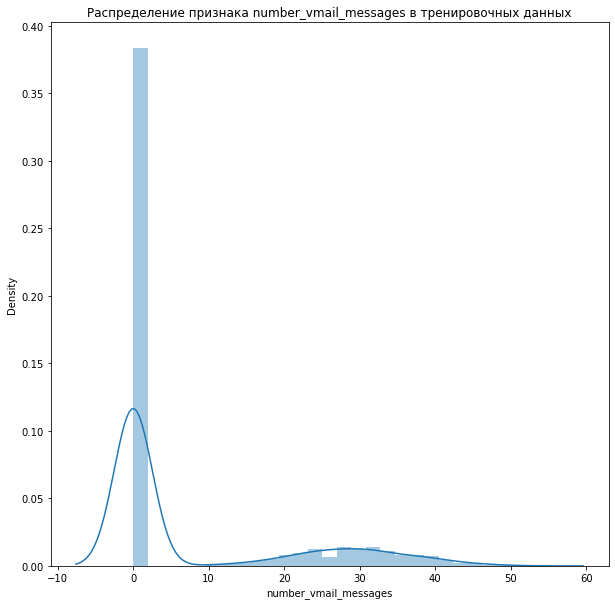

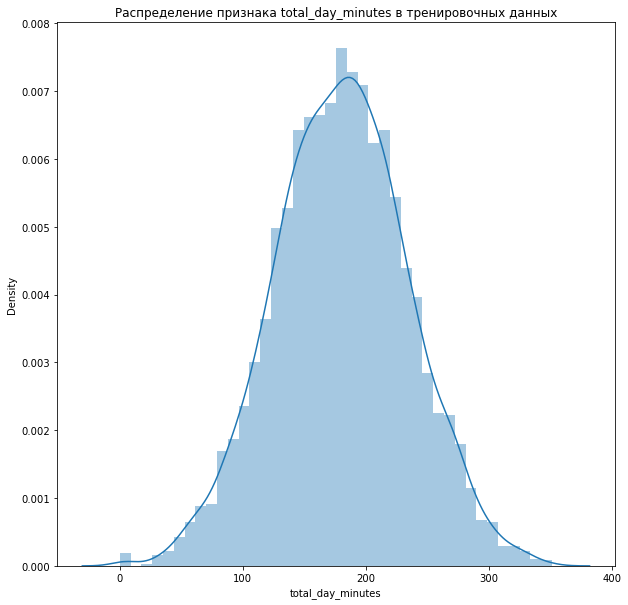

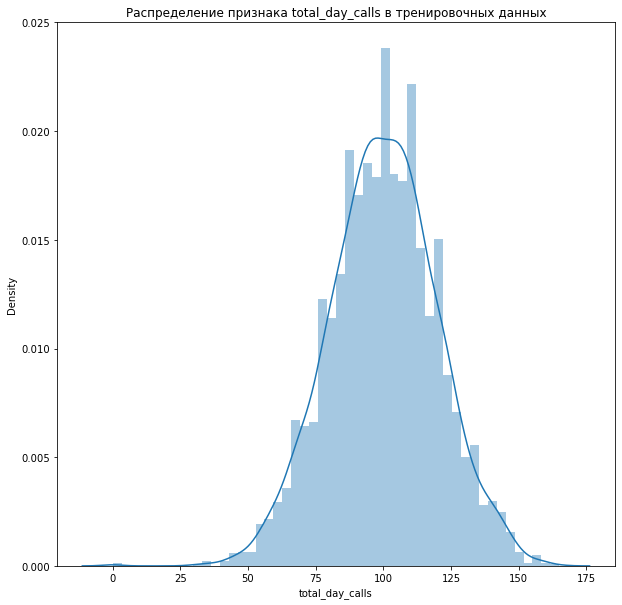

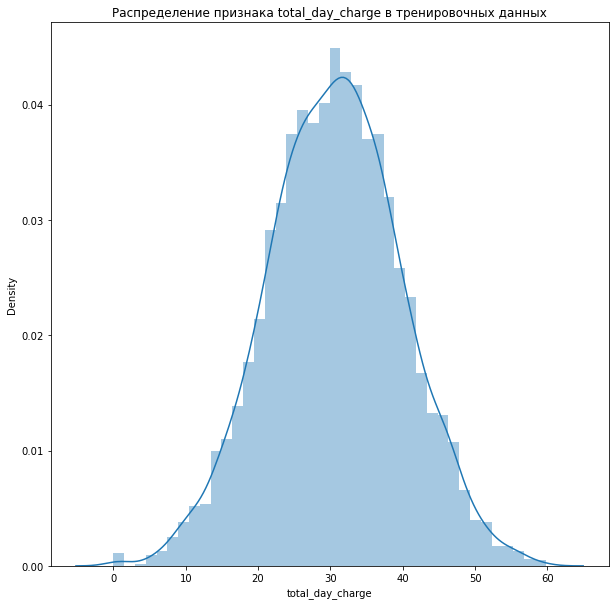

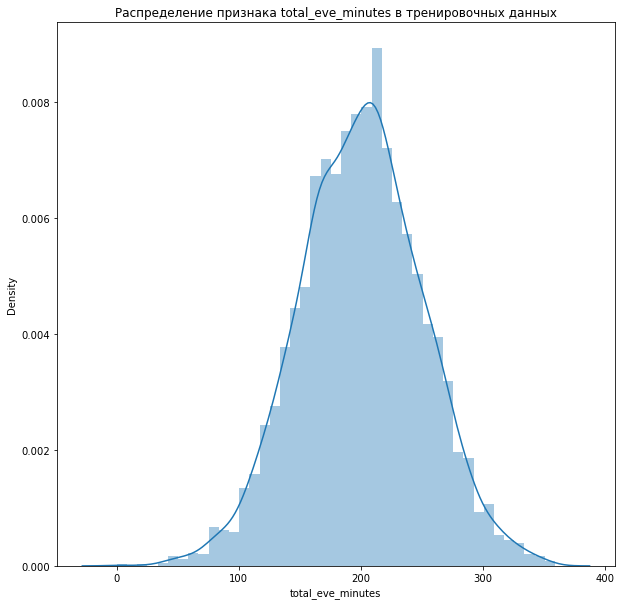

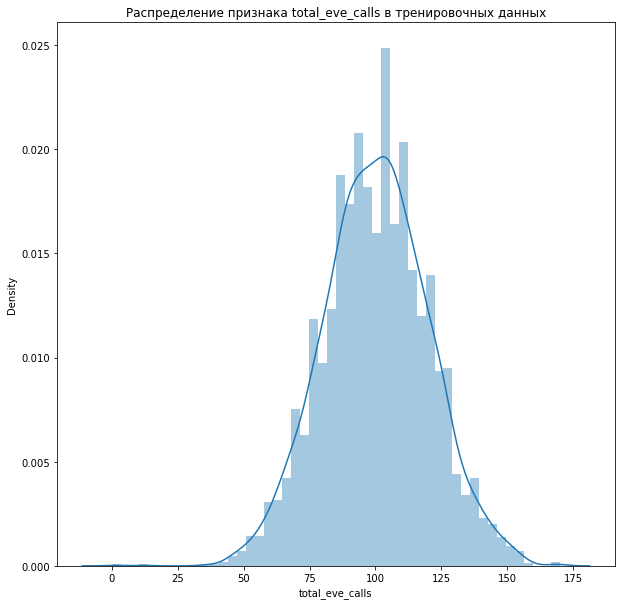

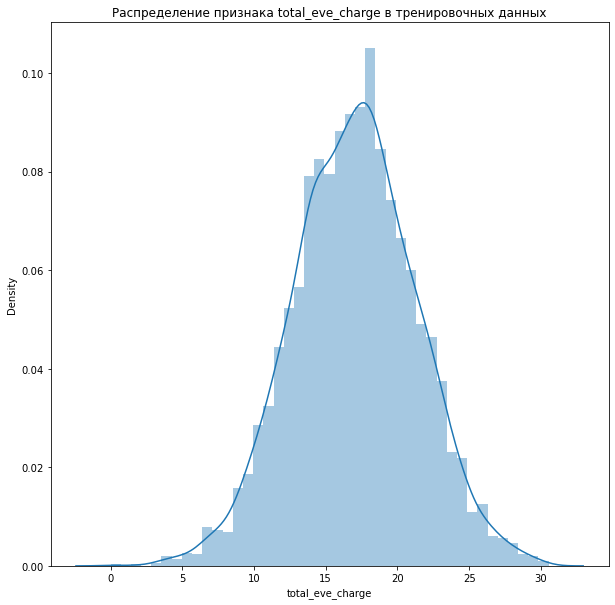

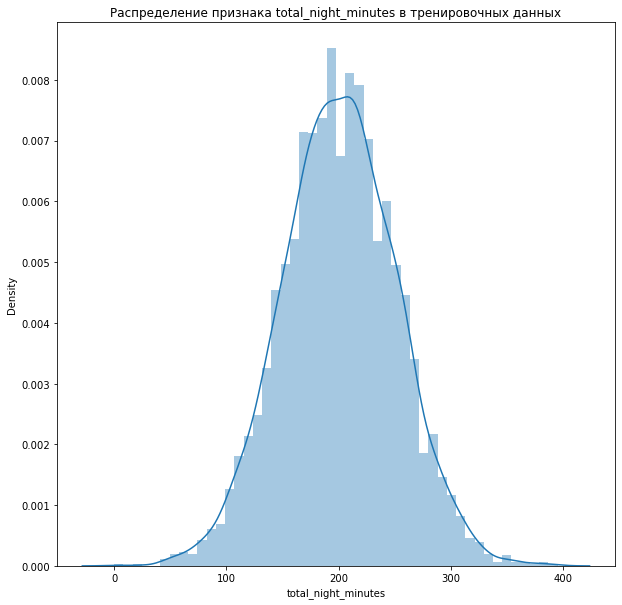

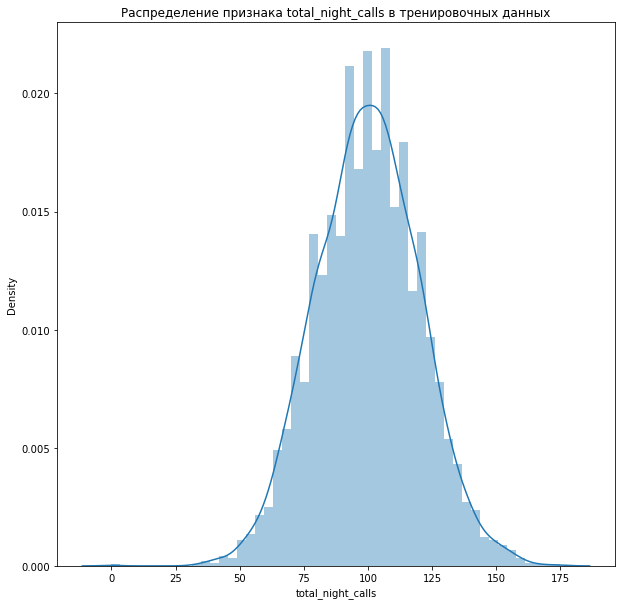

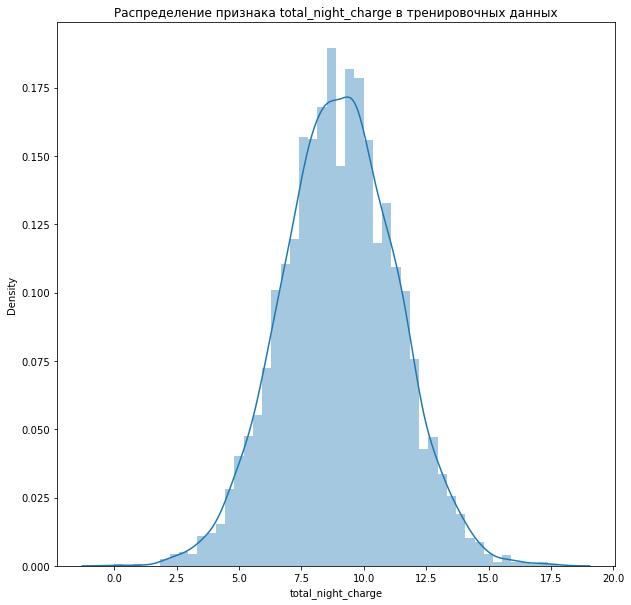

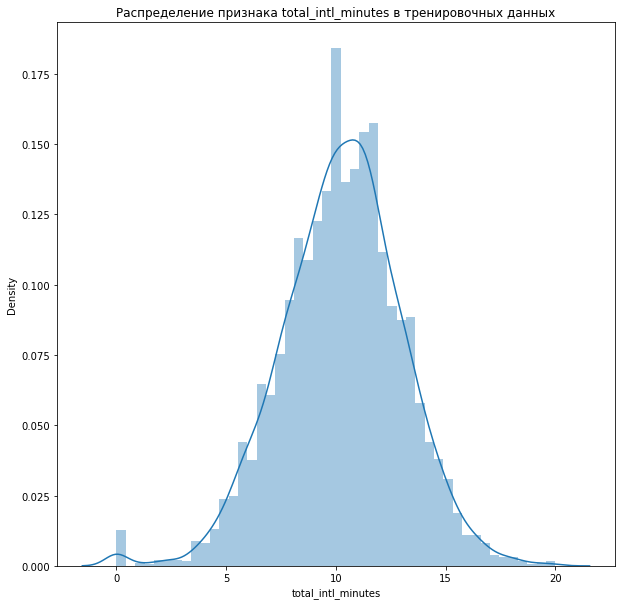

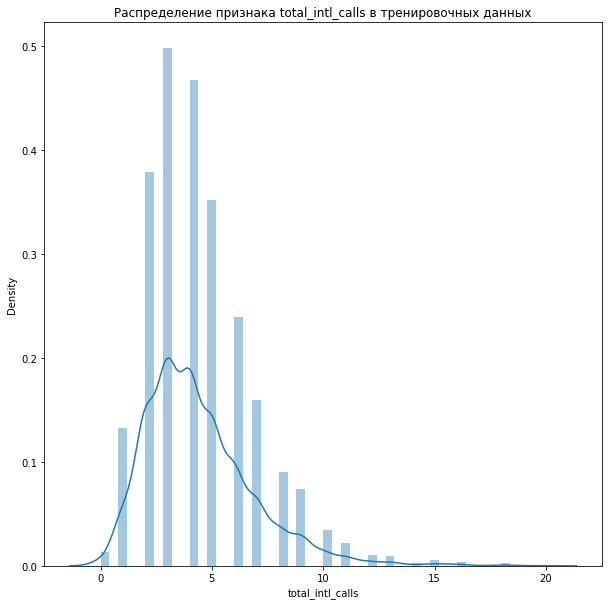

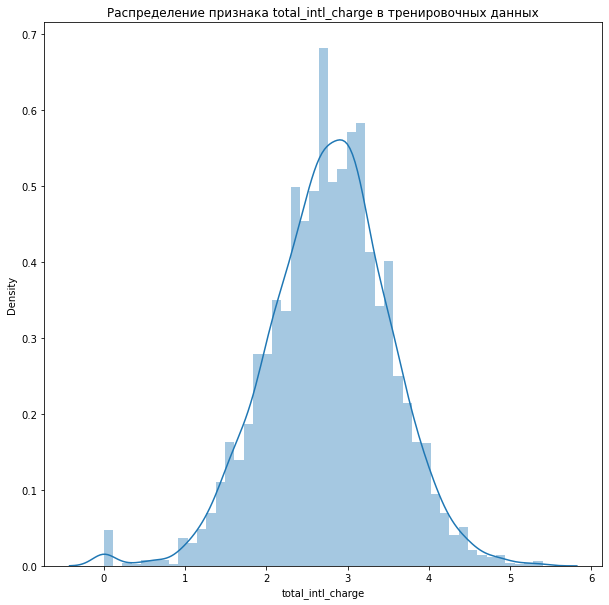

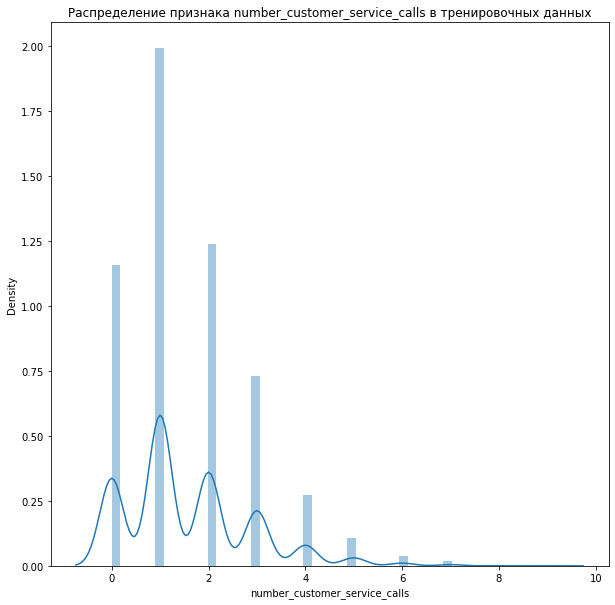

In [8]:
for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(train_data[col])

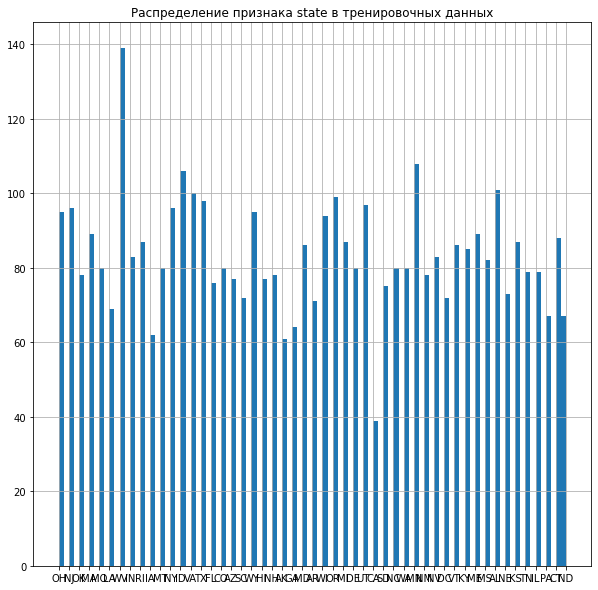

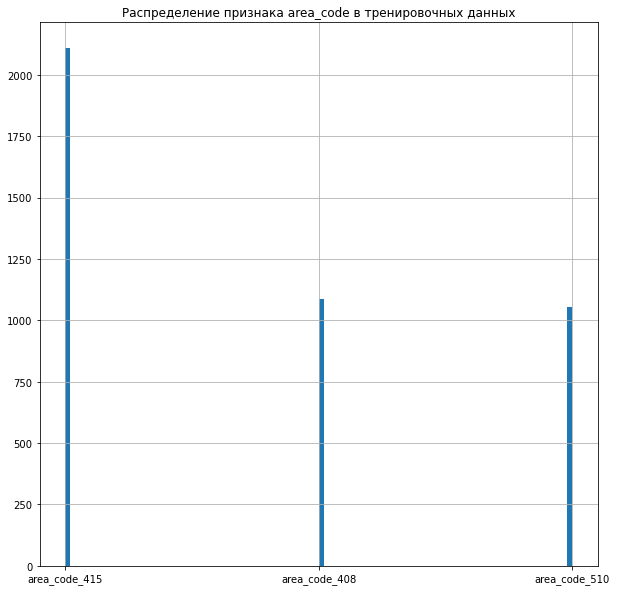

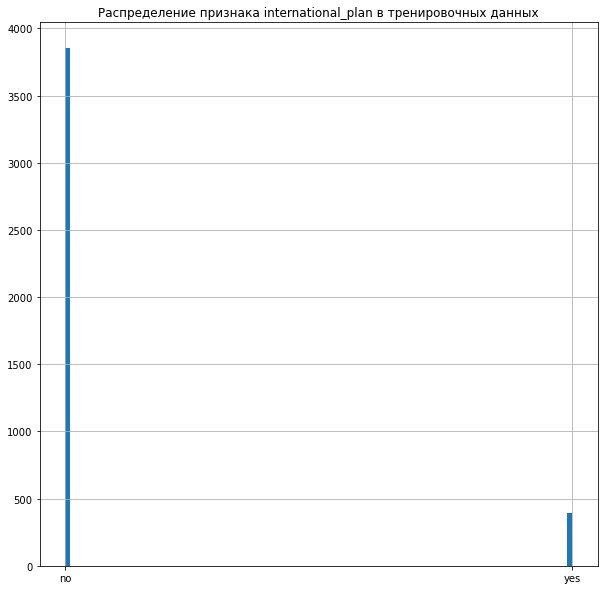

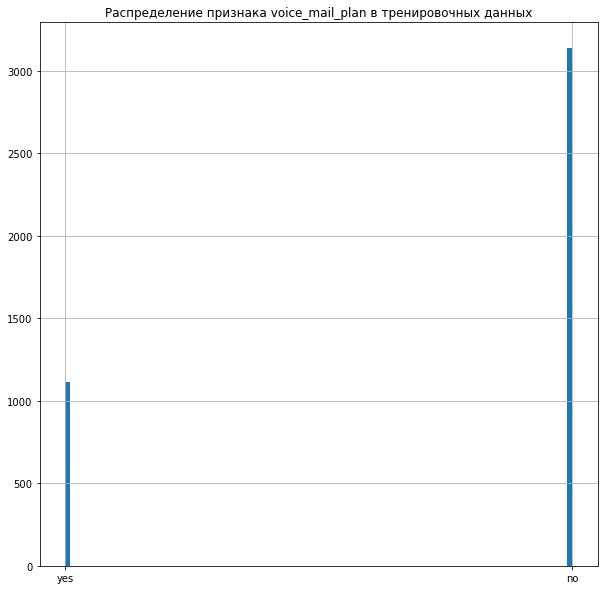

In [14]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    train_data[col].hist(bins = 100)

## Сравнение ушедших с оставшимися

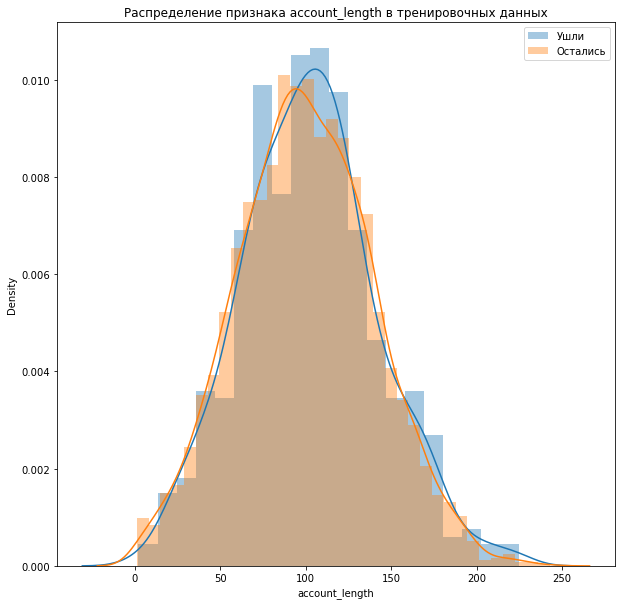

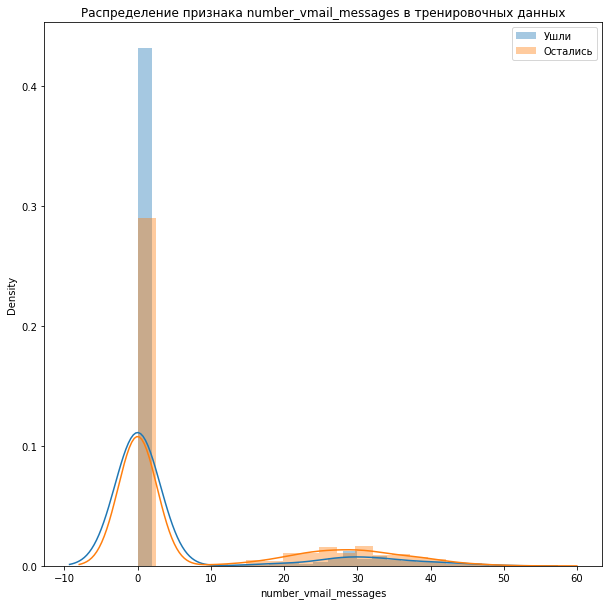

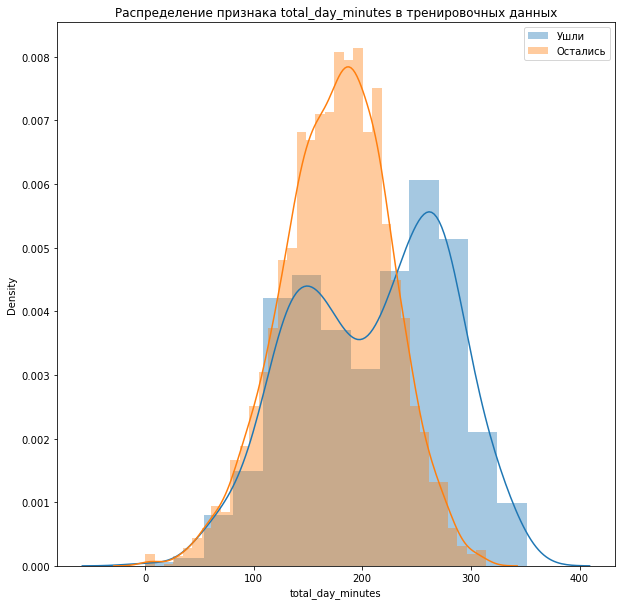

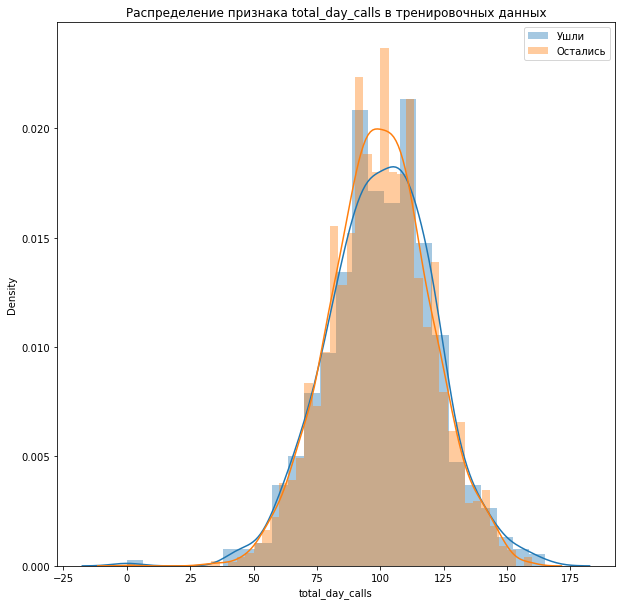

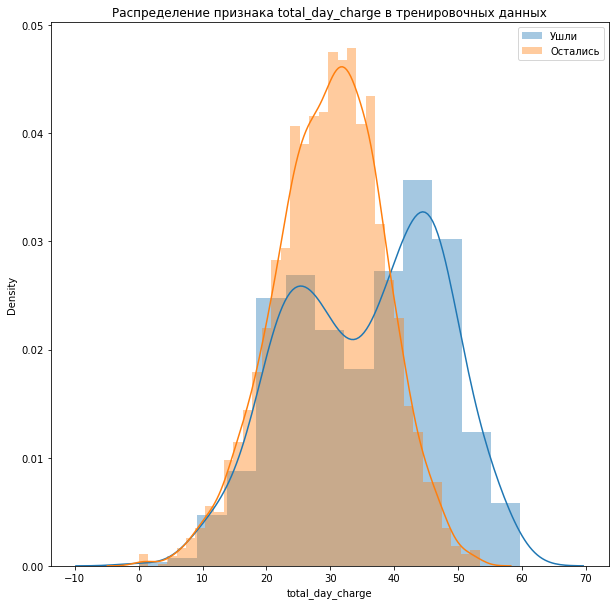

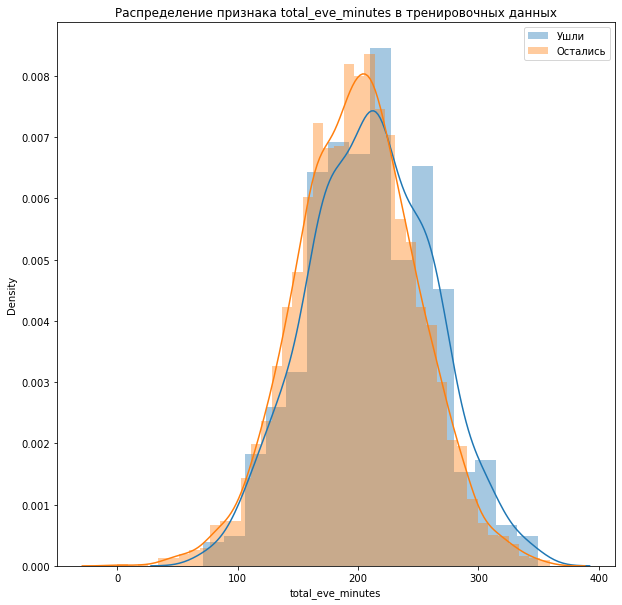

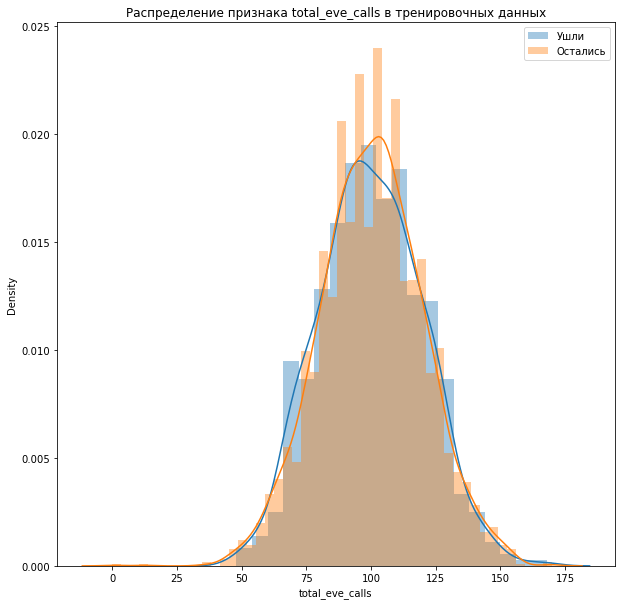

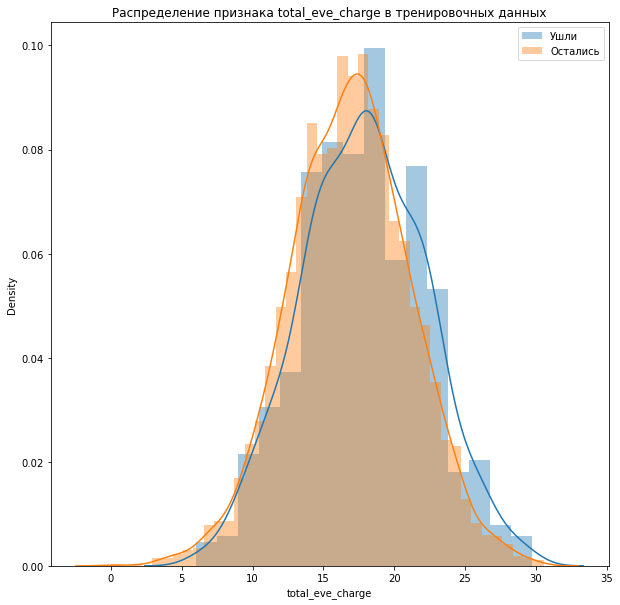

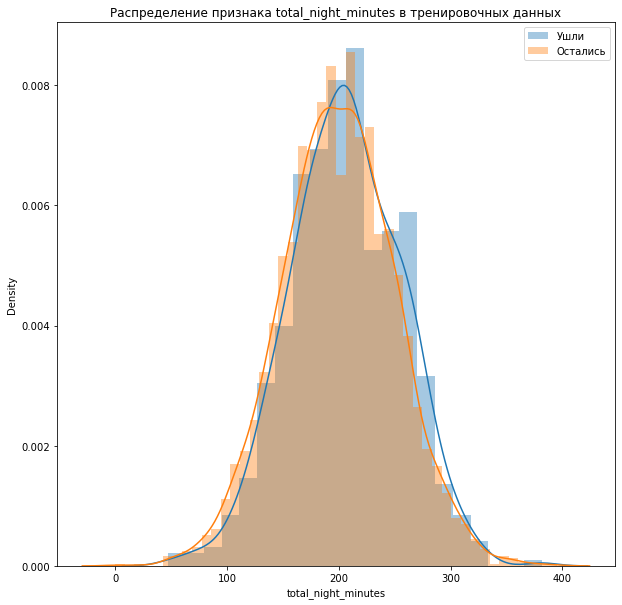

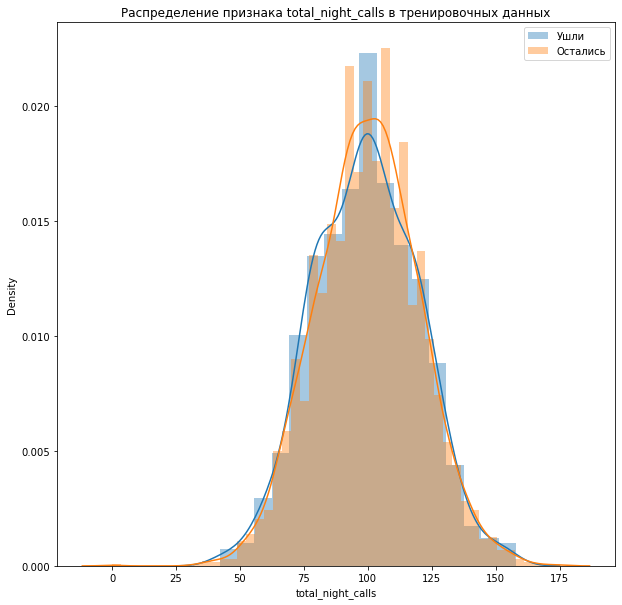

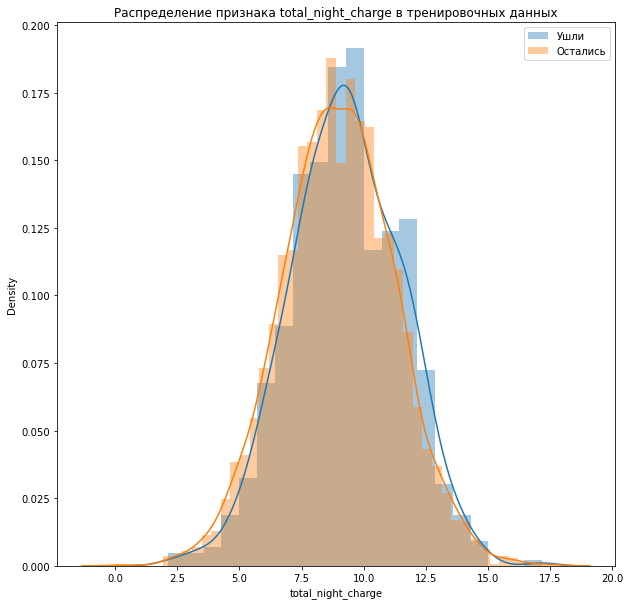

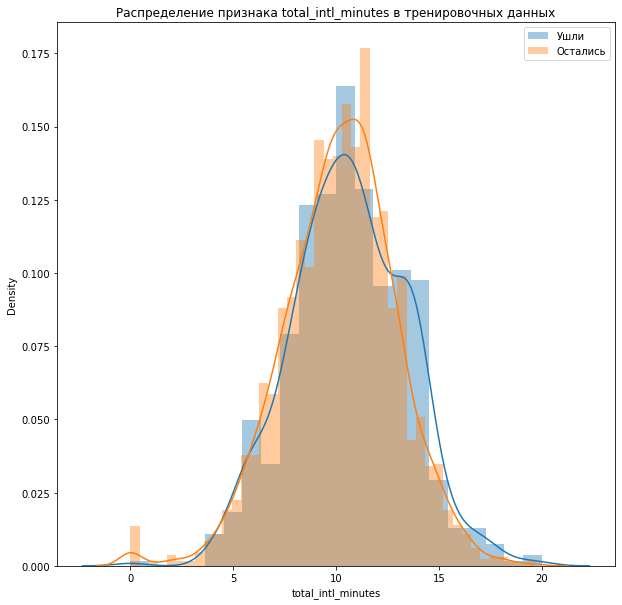

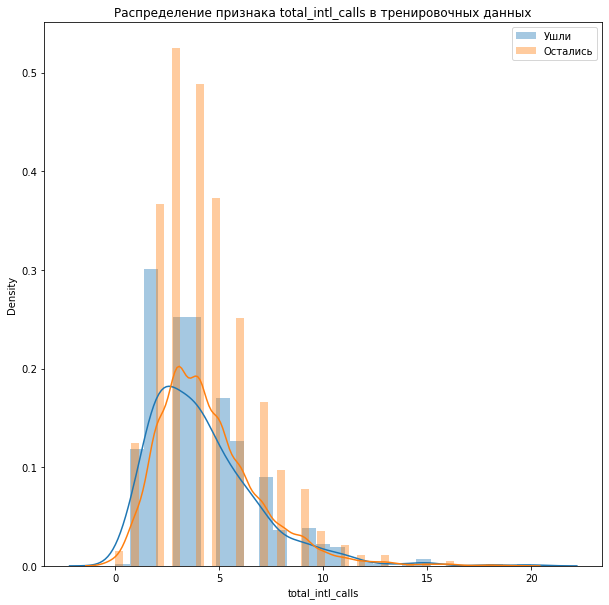

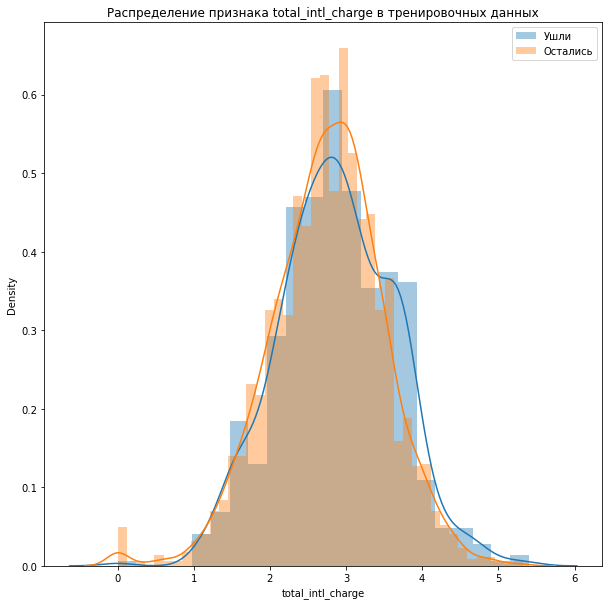

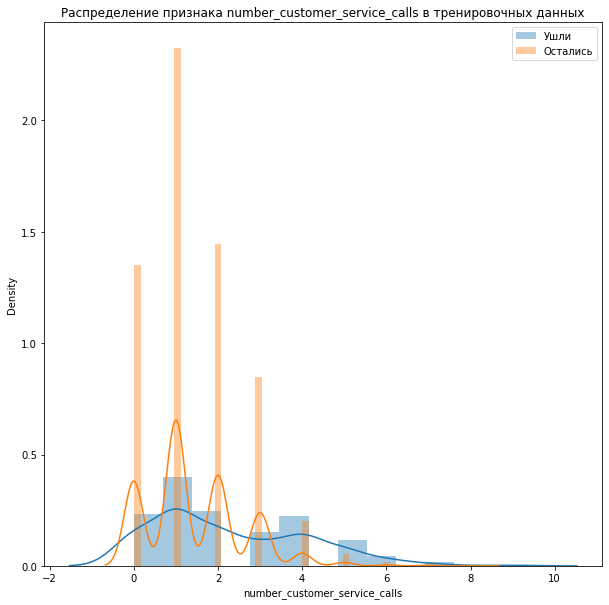

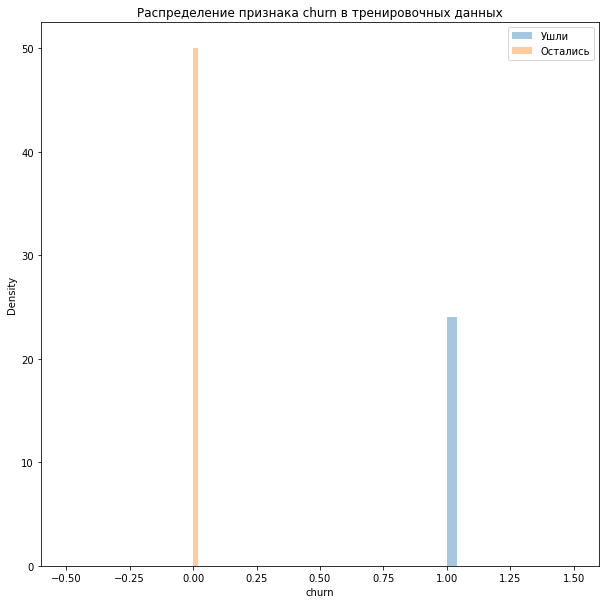

In [213]:
churn = train_data[train_data['churn'] == 1]
not_churn = train_data[train_data['churn'] == 0]


for col in num_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    sns.distplot(churn[col], label = 'Ушли')
    sns.distplot(not_churn[col], label = 'Остались')   
    plt.legend()

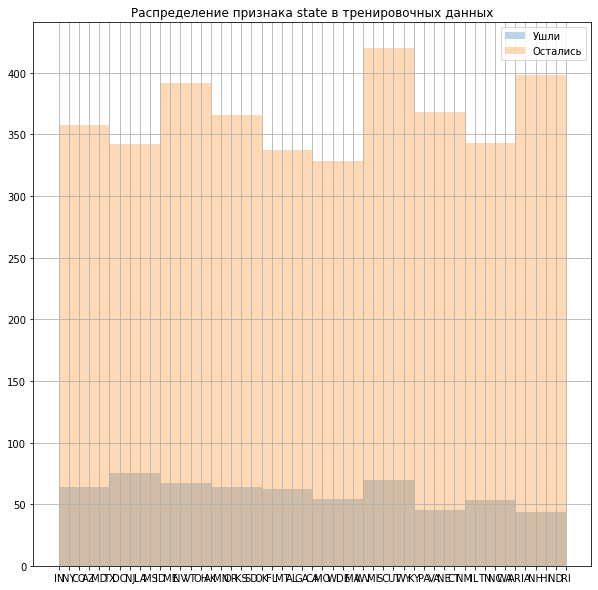

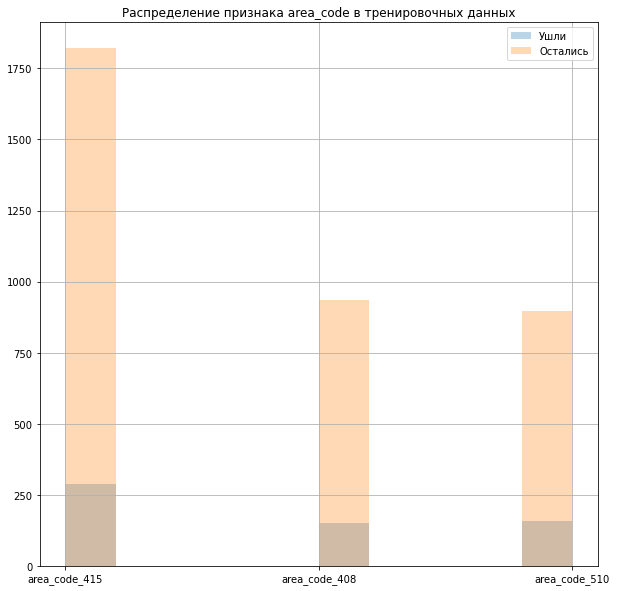

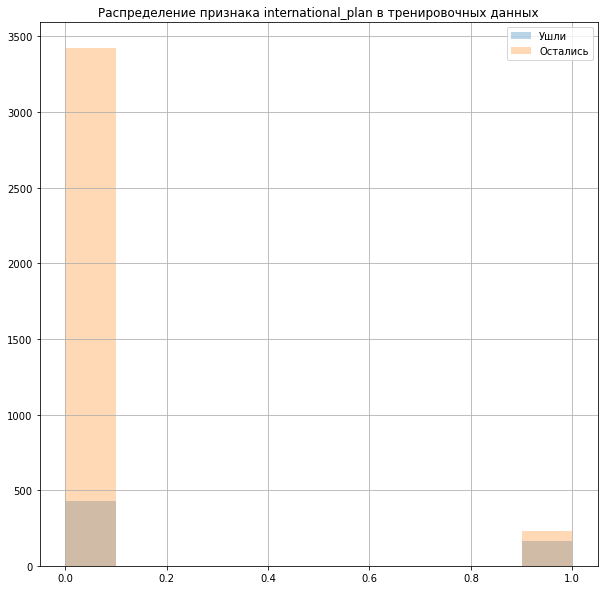

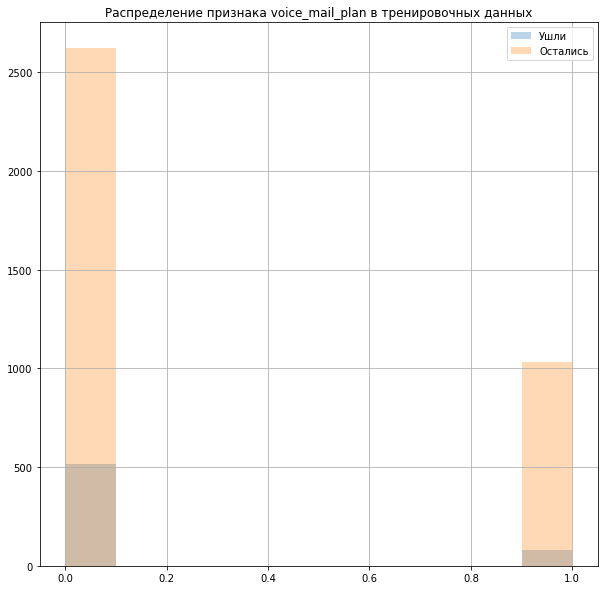

In [214]:
for col in str_cols:
    plt.figure(figsize = (10, 10))
    plt.title(f'Распределение признака {col} в тренировочных данных')
    churn[col].hist(label = 'Ушли', alpha=0.3)
    not_churn[col].hist(label = 'Остались', alpha = 0.3)   
    plt.legend()

In [19]:
from pandas.plotting import scatter_matrix

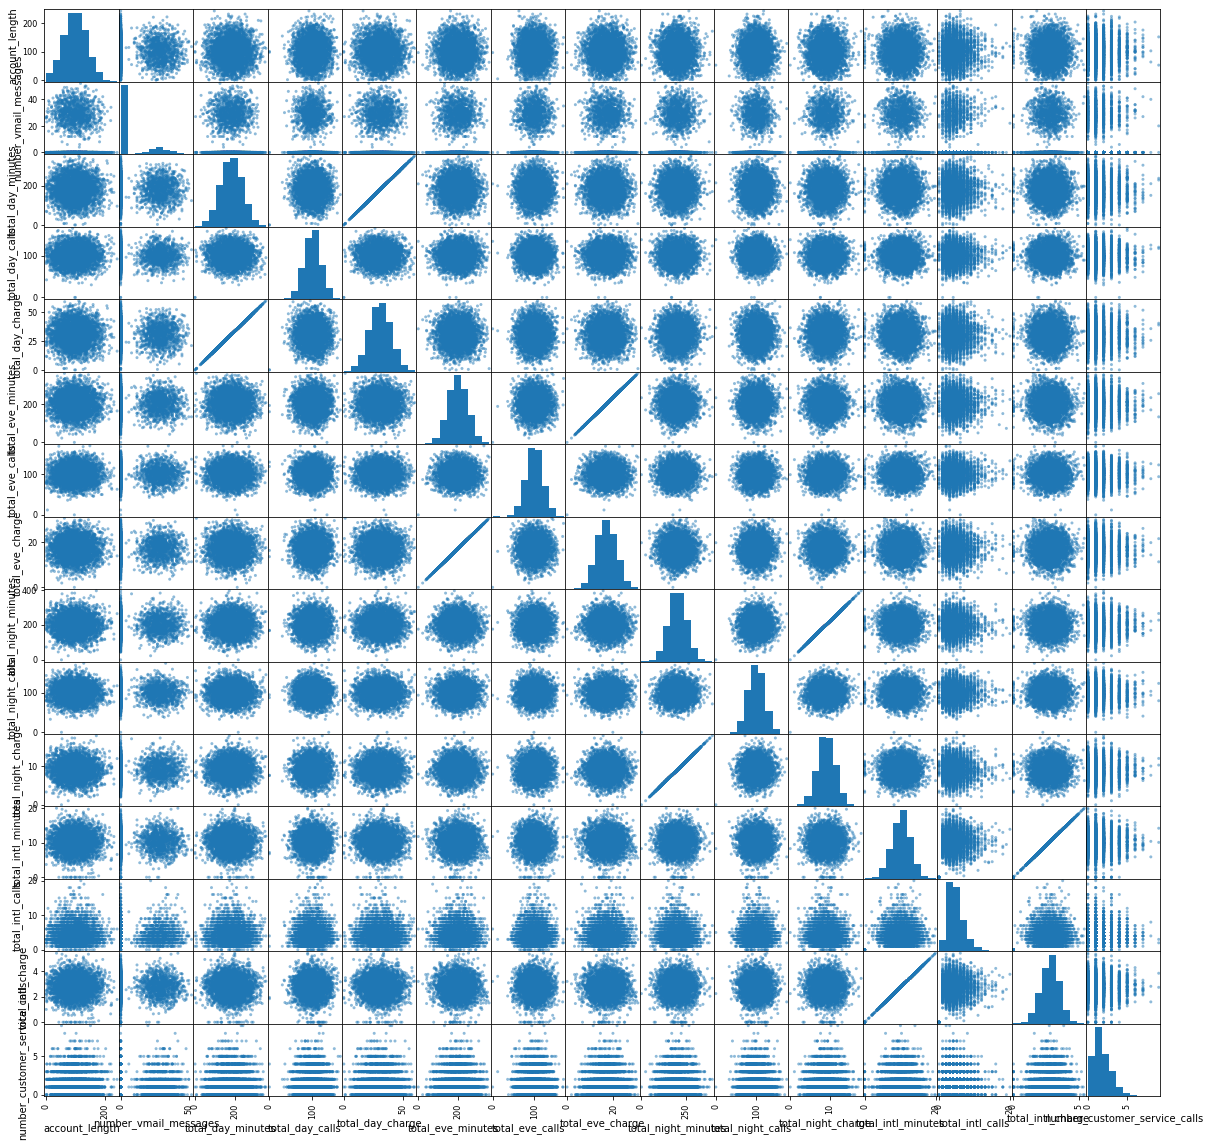

In [26]:
scatter_matrix(train_data[num_cols], figsize = (20, 20));

In [62]:
#Переведем еще 2 категриальных празнака в числовые
columns = ['international_plan', 'voice_mail_plan']
for col in columns:
    train_data[col] = train_data[col].apply(lambda x: 1 if x =='yes' else 0)    

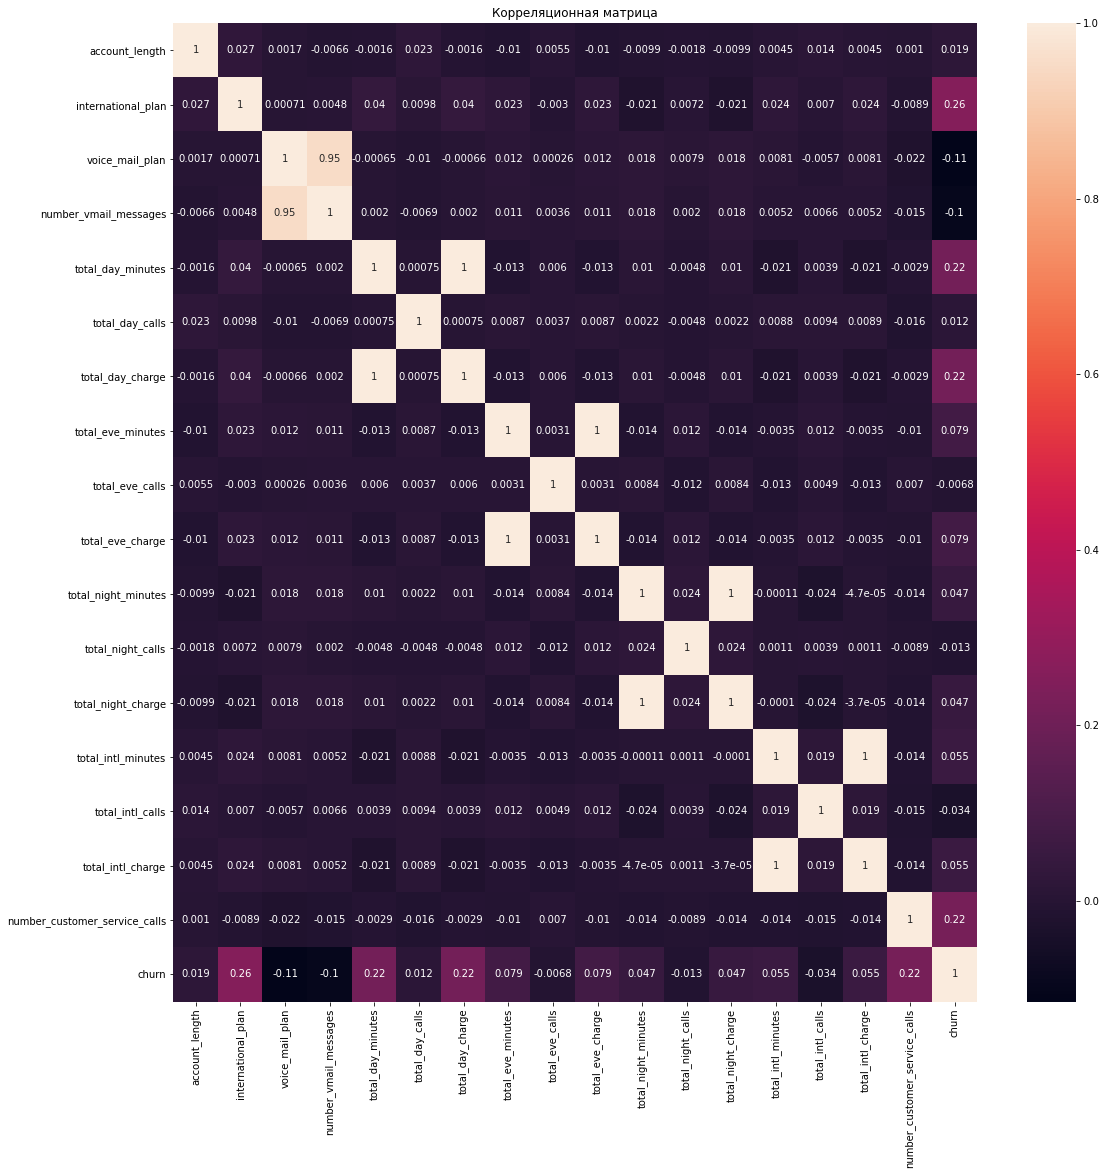

In [30]:
corr_m = train_data.corr()

# Визуализируем матрицу при помощи sns.heatmap
plt.figure(figsize = (18, 18))
plt.title('Корреляционная матрица')
sns.heatmap(corr_m, annot = True)
plt.show()

## Предобработка признаков

In [63]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)

(750, 20)


In [64]:
columns = ['international_plan', 'voice_mail_plan']

In [66]:
for col in columns:
    test_data[col] = test_data[col].apply(lambda x: 1 if x == 'yes' else 0)

In [35]:
test_data.head(3)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4


In [144]:
test_data['total_day_charge'].groupby(test_data['total_day_minutes']).sum().sample(3)

total_day_minutes
230.1    39.12
203.0    34.51
262.2    44.57
Name: total_day_charge, dtype: float64

### Кодировка через OneHotEncoding

In [36]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
ohe = OneHotEncoder() #OneHotEncoder(drop = 'first') - про drop First нужно изучить подробнее дополнительно

In [67]:
test_data = pd.read_csv('test.csv')
print(test_data.shape)

(750, 20)


In [68]:
columns = ['international_plan', 'voice_mail_plan']

In [69]:
for col in columns:
    test_data[col] = test_data[col].apply(lambda x: 1 if x == 'yes' else 0)

In [70]:
test_data.head(3)

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4


**Удалим 'id', т.к. это  лишний столбец, дублирующий индекс (номер строки в  данном случае)**

In [71]:
test_data = test_data.drop('id', axis = 1)

In [72]:
test_data.head(3)

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,KS,128,area_code_415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,AL,118,area_code_510,1,0,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,IA,62,area_code_415,0,0,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4


In [73]:
num_cols_test = []
str_cols_test = []

cols_and_type_test = test_data.dtypes.to_dict()

for col in cols_and_type_test:
    if cols_and_type_test[col] in ('int64', 'float64'):
        num_cols_test.append(col)
    else: 
        str_cols_test.append(col)
        
print(num_cols_test)

['account_length', 'international_plan', 'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge', 'total_eve_minutes', 'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls', 'total_night_charge', 'total_intl_minutes', 'total_intl_calls', 'total_intl_charge', 'number_customer_service_calls']


In [76]:
X = train_data.drop('churn', axis = 1)
y = train_data['churn']

**Т.к. дополнительную кодировку 2 параметров через lambda делали после разбивки на num_cols & str-cols в train_data, то теперь при Ohe нужно использовать сокращенный список по str_cols**

In [83]:
print('**train_data** ', str_cols, '\n', '**test_data** ', str_cols_test)

**train_data**  ['state', 'area_code', 'international_plan', 'voice_mail_plan'] 
 **test_data**  ['state', 'area_code']


In [78]:
str_cols[:-2]

['state', 'area_code']

In [84]:
X_ohe = ohe.fit_transform(X[str_cols[:-2]]) # OHE for train data X
test_data_ohe = ohe.fit_transform(test_data[str_cols_test]) #OHE for test data

X_ohe, test_data_ohe

(<4250x54 sparse matrix of type '<class 'numpy.float64'>'
 	with 8500 stored elements in Compressed Sparse Row format>,
 <750x54 sparse matrix of type '<class 'numpy.float64'>'
 	with 1500 stored elements in Compressed Sparse Row format>)

In [85]:
X_ohe_data = pd.DataFrame(X_ohe.toarray(), columns = ohe.get_feature_names())
test_data_ohe_data = pd.DataFrame(test_data_ohe.toarray(), columns = ohe.get_feature_names())

In [87]:
X_ohe_data.head(3)

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_area_code_408,x1_area_code_415,x1_area_code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [88]:
test_data_ohe_data.head(3)

,x0_AK,x0_AL,x0_AR,x0_AZ,x0_CA,x0_CO,x0_CT,x0_DC,x0_DE,x0_FL,...,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_area_code_408,x1_area_code_415,x1_area_code_510
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [98]:
list(test_data_ohe_data)[:3],[len(list(test_data_ohe_data))]

(['x0_AK', 'x0_AL', 'x0_AR'], [54])

In [101]:
test_data_ohe_data.shape, X_ohe_data.shape

((750, 54), (4250, 54))

In [99]:
test_data_ohe_data.columns.tolist()[:7]

['x0_AK', 'x0_AL', 'x0_AR', 'x0_AZ', 'x0_CA', 'x0_CO', 'x0_CT']

**Удалим категорийные столбцы из первоначальных датасетов (трейн и тест), чтобы на их место добавить закодированные данные**

In [91]:
X.drop(str_cols[:-2], axis = 1, inplace = True)
test_data.drop(str_cols_test, axis = 1, inplace = True)

In [92]:
# заменили строковые переменные из str_cols[:-2] и str_cols_test на значения Ohe
X[list(X_ohe_data)] = X_ohe_data
test_data[list(test_data_ohe_data)] = test_data_ohe_data 

### Train-Test-Split и Стандартизация и масштабирование данных черех StandardScaler

In [106]:
from sklearn.model_selection import train_test_split

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12345)

In [108]:
X.head()

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_area_code_408,x1_area_code_415,x1_area_code_510
0,107,0,1,26,161.6,123,27.47,195.5,103,16.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,137,0,0,0,243.4,114,41.38,121.2,110,10.30,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,84,1,0,0,299.4,71,50.90,61.9,88,5.26,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,75,1,0,0,166.7,113,28.34,148.3,122,12.61,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,121,0,1,24,218.2,88,37.09,348.5,108,29.62,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [109]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_sc = sc.fit_transform(X_train) # scaling тренировочной части тренировочных данных (train_data)
valid_data_sc = sc.transform(X_test) # scaling тестовой части тренировочных данных (train_data)

test_data_sc = sc.transform(test_data) # scaling тестовых данных (test_data, в ней изначально не было ЦелПерем)

In [110]:
X_sc = pd.DataFrame(X_sc, columns = list(X))

In [112]:
X_sc.head(3)

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,x0_UT,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_area_code_408,x1_area_code_415,x1_area_code_510
0,1.578901,-0.31505,1.684480,1.299854,0.737168,-0.054043,0.736890,0.211438,-0.061395,0.210437,...,-0.143925,-0.151209,-0.149161,-0.142857,-0.154234,-0.185413,-0.157206,1.722593,-0.995891,-0.57735
1,1.956261,-0.31505,1.684480,2.046353,-0.081937,-0.607038,-0.081780,-0.197734,-1.760533,-0.197790,...,-0.143925,-0.151209,-0.149161,-0.142857,-0.154234,-0.185413,-0.157206,-0.580520,1.004126,-0.57735
2,1.025441,-0.31505,-0.593655,-0.566396,0.097822,1.303309,0.098087,0.664736,-0.111370,0.665858,...,-0.143925,-0.151209,-0.149161,-0.142857,-0.154234,-0.185413,-0.157206,-0.580520,1.004126,-0.57735


In [113]:
test_data_sc = pd.DataFrame(test_data_sc, columns = list(X))

In [114]:
valid_data_sc = pd.DataFrame(valid_data_sc, columns = list(X))

## Обучение различных моделей

In [115]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score, make_scorer, f1_score

from sklearn.model_selection import cross_validate, cross_val_score

## Logistic Regression

In [124]:
log_reg = LogisticRegression(C = 0.8, random_state = 42, max_iter = 500, class_weight = 'balanced') 
#'balanced' - борется с дисбалансом классов (один из вариантов)

In [125]:
scorer = make_scorer(roc_auc_score, needs_proba = True) #roc_auc_score - хорош при сильном дисбалансе классов (цел.перем.)

In [126]:
cv_log_reg = cross_validate(log_reg, X_sc, y_train, cv = 5, scoring = scorer, n_jobs = -1)
cv_log_reg

In [127]:
cv_log_reg

{'fit_time': array([0.08095407, 0.05696893, 0.06496191, 0.05696893, 0.03997612]),
 'score_time': array([0.00699759, 0.01099467, 0.0059967 , 0.00799704, 0.0039947 ]),
 'test_score': array([0.79982836, 0.78857815, 0.82002366, 0.79174061, 0.83536676])}

In [128]:
print("Результаты Логистической регрессии:", sum(cv_log_reg['test_score']) / len(cv_log_reg['test_score']))

Результаты Логистической регрессии: 0.8071075052889688


<AxesSubplot:>

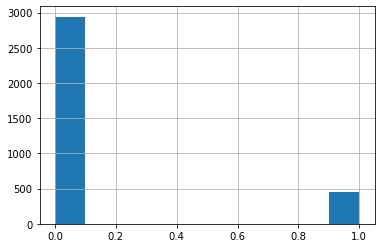

In [121]:
y_train.hist()

## Decision Tree Classifier

In [130]:
dec_tree = DecisionTreeClassifier(max_depth = 4, random_state = 42) # Можно найти более оптимальные гиперпараметры

In [131]:
cv_dec_tree = cross_validate(dec_tree, X_sc, y_train, cv = 5, scoring = scorer, n_jobs=-1)
cv_dec_tree

{'fit_time': array([0.03798056, 0.05396986, 0.03297973, 0.04197478, 0.03997803]),
 'score_time': array([0.00699401, 0.00699544, 0.00499678, 0.00799537, 0.01199532]),
 'test_score': array([0.8876938 , 0.82451165, 0.85835367, 0.85273403, 0.88766267])}

In [132]:
print("Результаты решающего дерева:", sum(cv_dec_tree['test_score']) / len(cv_dec_tree['test_score']))

Результаты решающего дерева: 0.8621911642614697


### Вариант с применением RandomizedSearchCV для Решающих деревьев

In [133]:
from sklearn.model_selection import RandomizedSearchCV

In [134]:
params = { 
    'max_depth': range(1,20)
}

In [136]:
rscv_dt = RandomizedSearchCV( dec_tree, 
                  param_distributions= params, 
                  cv= 5,
                  n_iter = 50, 
                  scoring = scorer)

In [138]:
rscv_dt.fit(X_sc, y_train).best_estimator_

DecisionTreeClassifier(max_depth=5, random_state=42)

In [139]:
rscv_dt.fit(X_sc, y_train).best_score_

0.8758371773452867

## RandomForestClassifier

In [140]:
ran_for = RandomForestClassifier(max_depth = 10, n_estimators = 100, random_state = 42) 
# Можно найти более оптимальные гиперпараметры

In [141]:
cv_ran_for = cross_validate(ran_for, X_sc, y_train, cv = 5, scoring = scorer, n_jobs=-1)
cv_ran_for

{'fit_time': array([0.84851456, 0.86950254, 0.87649894, 0.85151362, 0.73957682]),
 'score_time': array([0.04597569, 0.04897285, 0.05696869, 0.0449748 , 0.03697681]),
 'test_score': array([0.91294614, 0.89637866, 0.91895889, 0.91060337, 0.91001183])}

In [142]:
print("Результаты случайного леса дерева:", sum(cv_ran_for['test_score']) / len(cv_ran_for['test_score']))

Результаты решающего дерева: 0.9097797782683207


### Вариант с применением RandomizedSearchCV для Решающих деревьев

In [145]:
params = { 
    'max_depth': range(1,20),
    'n_estimators': range (50,500, 50)
}

In [151]:
rscv_rf = RandomizedSearchCV(ran_for , 
                  param_distributions = params, 
                  cv= 5,
                  n_iter = 100, 
                  scoring = scorer)

In [152]:
rscv_rf.fit(X_sc, y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(max_depth=10,
                                                    random_state=42),
                   n_iter=100,
                   param_distributions={'max_depth': range(1, 20),
                                        'n_estimators': range(50, 500, 50)},
                   scoring=make_scorer(roc_auc_score, needs_proba=True))

In [153]:
rscv_rf.best_estimator_

RandomForestClassifier(max_depth=17, n_estimators=50, random_state=42)

In [154]:
rscv_rf.best_score_

0.9152852604806252

**Как видно, лучший результат показал случайный лес**

## Интерпретация модели и важность признаков

In [155]:
log_reg.fit(X_sc, y_train)
print("Коэффициенты в линейной регрессии:", log_reg.coef_)

Коэффициенты в линейной регрессии: [[ 0.09893166  0.68609777 -0.80939687  0.35143275  0.38594805  0.05144796
   0.36676683  0.16630577  0.03554865  0.15643116  0.11464894 -0.06555637
   0.08784779  0.0528467  -0.11417024  0.11312318  0.82529122 -0.1065447
  -0.02758234  0.00691961  0.01515044  0.16827317 -0.05260138  0.0255014
  -0.00315824 -0.0023537  -0.04137253 -0.05740819 -0.18210131 -0.07881767
   0.04919026 -0.08336219  0.07862024 -0.03858961  0.03630424  0.04772192
   0.08194323 -0.01642161  0.06169588  0.02602523  0.04239974 -0.03983709
   0.0938538   0.11182591 -0.02336997 -0.0676485  -0.04725332 -0.02266144
   0.14725435 -0.06198739  0.03562463  0.00889949 -0.01217197  0.02166175
   0.03738474  0.01417327 -0.11958868  0.08274271  0.10227838  0.03922674
   0.04571878  0.02213732 -0.2539129  -0.04054643  0.12310442 -0.04589072
   0.01130419 -0.09040966  0.006513    0.00553653 -0.01292377]]


In [165]:
pd.DataFrame(log_reg.coef_.reshape(-1,1), list(X_sc)).sort_values(by=0, ascending = False).head(20)

,0
number_customer_service_calls,0.825291
international_plan,0.686098
total_day_minutes,0.385948
total_day_charge,0.366767
number_vmail_messages,0.351433
x0_CA,0.168273
total_eve_minutes,0.166306
total_eve_charge,0.156431
x0_NJ,0.147254
x0_WA,0.123104


In [171]:
intercept = log_reg.intercept_

In [173]:
dec_tree.fit(X_sc, y_train)
print("Важность признаков решающего дерева", dec_tree.feature_importances_)

Важность признаков решающего дерева [0.         0.09785658 0.08411243 0.         0.04867026 0.
 0.34457283 0.02869782 0.         0.05125024 0.01409761 0.
 0.         0.         0.11666241 0.00585713 0.20344786 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00477484 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [174]:
pd.DataFrame(dec_tree.feature_importances_, list(X_sc)).sort_values(by = 0, ascending = False).head(20)

,0
total_day_charge,0.344573
number_customer_service_calls,0.203448
total_intl_calls,0.116662
international_plan,0.097857
voice_mail_plan,0.084112
total_eve_charge,0.051250
total_day_minutes,0.048670
total_eve_minutes,0.028698
total_night_minutes,0.014098
total_intl_charge,0.005857


In [169]:
ran_for.fit(X_sc, y_train)
print("Важность признаков решающего дерева", ran_for.feature_importances_)

Важность признаков решающего дерева [0.02401042 0.07704592 0.02254701 0.03290546 0.14681359 0.02275254
 0.16072393 0.04807021 0.02159065 0.05699485 0.03217505 0.02100369
 0.03059325 0.03441744 0.03921423 0.03577832 0.11584163 0.00038092
 0.00077028 0.00162487 0.00126226 0.00154343 0.00130535 0.0013924
 0.00084834 0.00106754 0.00064226 0.00102936 0.00044957 0.00055199
 0.00149589 0.00148746 0.00219591 0.00138521 0.00092728 0.00042459
 0.00118048 0.00233752 0.00157464 0.00099907 0.00153198 0.00037296
 0.00199076 0.00166794 0.00059006 0.00060512 0.00088911 0.00097659
 0.00555754 0.00136418 0.00142961 0.00146211 0.00087947 0.00135731
 0.00147513 0.00112416 0.00071507 0.00173105 0.00176509 0.00188995
 0.00222603 0.00145856 0.0004944  0.00102445 0.00204403 0.00071368
 0.0017544  0.00072695 0.00332328 0.00402835 0.00347585]


In [175]:
pd.DataFrame(ran_for.feature_importances_, list(X_sc)).sort_values(by = 0, ascending =  False).head(20)

,0
total_day_charge,0.160724
total_day_minutes,0.146814
number_customer_service_calls,0.115842
international_plan,0.077046
total_eve_charge,0.056995
total_eve_minutes,0.048070
total_intl_calls,0.039214
total_intl_charge,0.035778
total_intl_minutes,0.034417
number_vmail_messages,0.032905


## Validation и Prediction на выбранной моделе

**Выбрала Random Forest, т.к. эта модель показала самую высокую точность**

In [176]:
ran_for = RandomForestClassifier(max_depth = 17, n_estimators = 50, random_state = 42)

In [182]:
ran_for.fit(X_sc, y_train)

RandomForestClassifier(max_depth=17, n_estimators=50, random_state=42)

In [183]:
validate_pred = ran_for.predict(valid_data_sc)

In [201]:
a = pd.DataFrame({'preds ':validate_pred, 'fact ':y_test})

<AxesSubplot:ylabel='Count'>

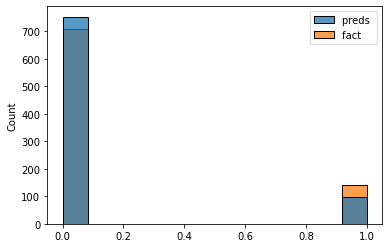

In [200]:
sns.histplot(a)

In [203]:
roc_auc_score(y_test, validate_pred)

0.8250503018108651

In [204]:
test_pred = ran_for.predict(test_data_sc)

array([[<AxesSubplot:title={'center':'predicted_churn '}>]], dtype=object)

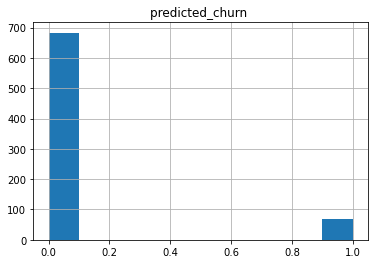

In [211]:
b = pd.DataFrame({'predicted_churn ':test_pred})
b.hist()

In [212]:
test_data_pred = pd.concat([test_data, b], axis = 1)
test_data_pred

,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,x0_VA,x0_VT,x0_WA,x0_WI,x0_WV,x0_WY,x1_area_code_408,x1_area_code_415,x1_area_code_510,predicted_churn
0,128,0,1,25,265.1,110,45.07,197.4,99,16.78,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
1,118,1,0,0,223.4,98,37.98,220.6,101,18.75,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,62,0,0,0,120.7,70,20.52,307.2,76,26.11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
3,93,0,0,0,190.7,114,32.42,218.2,111,18.55,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,174,0,0,0,124.3,76,21.13,277.1,112,23.55,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,130,0,0,0,119.4,99,20.30,226.3,97,19.24,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0
746,73,0,0,0,177.2,118,30.12,270.5,84,22.99,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0
747,152,0,0,0,184.2,90,31.31,256.8,73,21.83,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
748,61,0,0,0,140.6,89,23.90,172.8,128,14.69,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0


## Выводы по параметрам датасета

- Существуетвысокая корреляция между параметрами 'Total_day(/eve/night/intl)_minutes' и 'Total_day(/eve/night/intl)_charge'. Это взаимозависимые параметры и если анализировать один из показатпелей minutes с соответствующим показателем charge, то это можно считать data leakage;
<br>
<br>
- Churn: 
<br>`положительная корреляция`: international_plan, totla_day_minutes, total_day_charge, number_customer_service_calls. 
<br>`отрицательный коэффициент корреляции (обратная корреляция)`: voice_mail_plan, total_intl_calls.

- самые вксрмые параметры для выбранной модели:

In [230]:
pd.DataFrame(ran_for.feature_importances_, list(X_sc)).sort_values(by = 0, ascending =  False).head(20)

,0
total_day_charge,0.149964
total_day_minutes,0.119322
number_customer_service_calls,0.100547
international_plan,0.067760
total_eve_charge,0.059489
total_eve_minutes,0.051517
total_intl_calls,0.044329
total_intl_minutes,0.041267
total_night_minutes,0.039193
total_night_charge,0.037509
